## EDA

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
import statistics
import statsmodels.tsa.stattools as tsa
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from scipy.stats import shapiro

In [141]:
packageData = pd.read_csv('packages.csv')

In [17]:
packageData.head()

,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,impressions,clicks,first_place,winner
0,20/11/2014,17/11/2014,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Anyone who's ever felt guilty about shopping a...,NaN,3052,150,True,True
1,20/11/2014,17/11/2014,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Walmart is getting schooled by another retaile...,NaN,3033,122,False,False
2,20/11/2014,17/11/2014,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Walmart may not be crapping their pants over t...,NaN,3092,110,False,False
3,20/11/2014,17/11/2014,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546bc55335992b86c8000043,Things that matter. Pass 'em on.,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,"If you ever wondered, ""but what about the men?...",NaN,3526,90,False,False
4,20/11/2014,17/11/2014,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546d900426714cd2dd00002e,Things that matter. Pass 'em on.,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,"If you ever wondered, ""but what about the men?...",NaN,3506,120,True,False


#### Package Data Set Summary Statistics

In [142]:
# basic information about data frame
print(packageData.info())
# summarising numerical variables
display(packageData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150817 entries, 0 to 150816
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_at   150817 non-null  object
 1   test_week    150817 non-null  object
 2   test_id      150817 non-null  object
 3   headline     150816 non-null  object
 4   image_id     150636 non-null  object
 5   excerpt      134790 non-null  object
 6   lede         150713 non-null  object
 7   slug         150817 non-null  object
 8   share_text   20900 non-null   object
 9   share_image  49800 non-null   object
 10  impressions  150817 non-null  int64 
 11  clicks       150817 non-null  int64 
 12  first_place  150817 non-null  bool  
 13  winner       150817 non-null  bool  
dtypes: bool(2), int64(2), object(10)
memory usage: 14.1+ MB
None


,impressions,clicks
count,150817.000000,150817.000000
mean,3569.046447,54.255648
std,1435.995922,45.521282
min,1.000000,0.000000
25%,2745.000000,25.000000
50%,3117.000000,42.000000
75%,4089.000000,70.000000
max,36908.000000,975.000000


Of the variables that we are interested in, Headline and Image variables contain null values. These will need to be removed from the analysis

In [143]:
# checking percentage NaN values
print('Percentage of headlines missing: %',(packageData['headline'].isnull().sum()*100)/len(packageData['headline']))
print('Percentage of image IDs missing: %',(packageData['image_id'].isnull().sum()*100)/len(packageData['image_id']))

Percentage of headlines missing: % 0.0006630552258697627
Percentage of image IDs missing: % 0.12001299588242705


In [148]:
# Subsetting columns of data frame to include only variables which will be used in our analysis
packageData = packageData[['created_at', 'test_week', 'test_id', 'headline', 'image_id', 'impressions', 'clicks', 'first_place', 'winner']]
print(packageData.info())
# removing rows which contain NaN values
packageData = packageData.dropna(axis=0, how='any').reset_index(drop=True)
print(packageData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150635 entries, 0 to 150634
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_at   150635 non-null  object
 1   test_week    150635 non-null  object
 2   test_id      150635 non-null  object
 3   headline     150635 non-null  object
 4   image_id     150635 non-null  object
 5   impressions  150635 non-null  int64 
 6   clicks       150635 non-null  int64 
 7   first_place  150635 non-null  bool  
 8   winner       150635 non-null  bool  
dtypes: bool(2), int64(2), object(5)
memory usage: 8.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150635 entries, 0 to 150634
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_at   150635 non-null  object
 1   test_week    150635 non-null  object
 2   test_id      150635 non-null  object
 3   headline     150635 non-null  object
 4

#### Finding the number of tests conducted, and the number of packages within a test

Number of test conducted:  32435
Mean:  4.644211499922923
Median:  4.0
Standard Deviation 1.2004783212126469

Frequency Table: 
4     16931
5      6162
6      5671
3      1174
7       889
2       845
8       517
9       114
10       59
11       32
12       10
13        8
14        8
17        5
15        4
1         3
16        2
20        1
dtype: int64


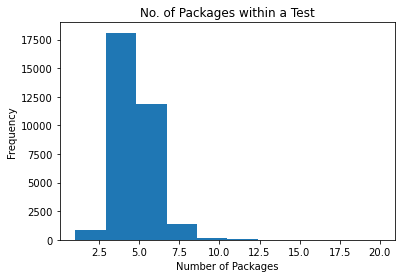

In [149]:
noTests = packageData['test_id'].nunique()
print('Number of test conducted: ', noTests)

testCounts = pd.Series(Counter(packageData['test_id']).values())

print('Mean: ', testCounts.mean())
print('Median: ', testCounts.median())
print('Standard Deviation', testCounts.std())
print('\nFrequency Table: ')
print(testCounts.value_counts())
plt.hist(testCounts)
plt.xlabel('Number of Packages')
plt.ylabel('Frequency')
plt.title('No. of Packages within a Test')
plt.show()

Determining how often, on average, an image is used

In [150]:
timesUsed = round(len(packageData['image_id'])/packageData['image_id'].nunique(), 3)
print('images are used {} times on average'.format(timesUsed))

images are used 3.452 times on average


We need to determine how many distinct headlines within a test have the same image, as these are the only ones we can directly compare to investigate our chosen treatment effect. Is there more than two distinct headlines?  

In [151]:
## SUMARISING INDIVIDUAL TESTS

# creating dictionary to store information about individual tests
testDic = {}
# extraction list of unique test IDs
uniqueTestIDs = Counter(packageData['test_id']).keys()

# looping through tests, extracting relevant information about them, and adding this to testDic
for testID in tqdm(uniqueTestIDs):
    testDic[testID] = []
    packagesInTest =  packageData[packageData['test_id'] == testID]
    # storing indexes of packages so we can subset them from main dataframe
    testDic[testID].append(packagesInTest.index)
    # recording the number of times each image appears within a test
    testDic[testID].append(Counter(packagesInTest['image_id']).values())
    # Grouping Images by headline to identify duplicates
    duplicates = packagesInTest.groupby(['headline','image_id'], as_index = False).size()['size']
    #duplicates = packagesInTest.pivot_table(columns=['image_id','headline'], aggfunc='size').values
    testDic[testID].append(duplicates)

100%|████████████████████████████████████████████████████████████████████████████| 32435/32435 [07:01<00:00, 76.87it/s]


In [154]:
# Determining total number of redundant packages
TotReplicates = 0
for test in tqdm(testDic):
  TotReplicates += testDic[test][2].subtract(1).sum()

print('Total number of redundant packages: ', TotReplicates)

# Examining structure of replicates
NumReplicates = []
for test in tqdm(testDic):
  if (testDic[test][2].subtract(1).sum() > 0):
    NumReplicates.append(str(testDic[test][2].subtract(1).values))

print('Most Common Duplicate Structures:\n', Counter(NumReplicates).most_common(10))


100%|██████████████████████████████████████████████████████████████████████████| 32435/32435 [00:03<00:00, 8864.28it/s]


Total number of redundant packages:  21952


100%|██████████████████████████████████████████████████████████████████████████| 32435/32435 [00:04<00:00, 6736.11it/s]

Most Common Duplicate Structures:
 [('[3]', 2736), ('[4]', 1059), ('[5]', 861), ('[1 1]', 252), ('[2]', 224), ('[1]', 216), ('[2 0]', 142), ('[0 2]', 127), ('[6]', 106), ('[1 0 0]', 89)]


### Analysis Variance and Distribution of Click-Rate

Since we have got repeated observations, we can investigate the population variance in package-click rate

In [155]:
## Extracting package ID for replicated values

RepID = {}

uniqueTestIDs = Counter(packageData['test_id']).keys()
for testID in tqdm(uniqueTestIDs):
    packagesInTest =  packageData[packageData['test_id'] == testID]
    withoutDuplicatesIndex = packagesInTest.drop_duplicates(subset=['headline', 'image_id'], keep=False).index.values
    duplicatesIndex = packagesInTest.index.drop(withoutDuplicatesIndex)
    RepID[testID] = duplicatesIndex.values

100%|████████████████████████████████████████████████████████████████████████████| 32435/32435 [06:22<00:00, 84.85it/s]


In [156]:
print(RepID)

{'546d88fb84ad38b2ce000024': array([    0,     1,     2, 22643], dtype=int64), '546d902c26714c6c44000039': array([], dtype=int64), '546deb3f26714cd2dd00003a': array([], dtype=int64), '546e009a9ad54ec65b00004b': array([], dtype=int64), '546dfa4226714c0538000064': array([18, 19, 20, 21], dtype=int64), '546cb9c954524053ac000013': array([], dtype=int64), '546e454a9ad54e2af0000070': array([], dtype=int64), '54d1967c63666200191c0000': array([], dtype=int64), '546e2ce926714c856600004f': array([], dtype=int64), '546e40d226714cd2dd00006f': array([], dtype=int64), '546e5e0d9ad54eca48000061': array([], dtype=int64), '546e80f084ad380752000096': array([50, 52, 53, 54], dtype=int64), '546e884b0f6b59d292000001': array([], dtype=int64), '546e9e7f87942a5546000003': array([], dtype=int64), '546eccc187942aedcb000013': array([], dtype=int64), '546ee60687942a5546000028': array([], dtype=int64), '546f486992f391bd48000025': array([72, 73, 74], dtype=int64), '546f4e0387942a3efd000029': array([75, 76, 77, 78],

__Assumption: The distribution of click-rate for any given package is identical__

Under this assumption, we can use a pooled variance to estimate the population variance $\sigma^2$
See: https://en.wikipedia.org/wiki/Pooled_variance for formula details

In [159]:
packageData['clickrate'] = packageData["clicks"]/packageData["impressions"]

Numerator = 0
Denominator = 0
k = 0
uniqueTestIDs = Counter(packageData['test_id']).keys()
for testID in tqdm(uniqueTestIDs):
    if (len(RepID[testID]) > 0):
        duplicates = packageData.iloc[RepID[testID], ]
        groupedDuplicates = duplicates.groupby(['headline'])
        for headline in Counter(duplicates['headline']).keys():
            rate = groupedDuplicates.get_group(headline)['clickrate']
            if (len(rate) > 1):
                k += 1
                Denominator += len(rate)
                Numerator += (len(rate) - 1) * statistics.variance(rate)

pooledSampleVar = Numerator/(Denominator - k)
print('Estimated Pooled Variance: ', pooledSampleVar)

100%|██████████████████████████████████████████████████████████████████████████| 32435/32435 [00:07<00:00, 4577.29it/s]

Estimated Pooled Variance:  1.3816000771008667e-05


100%|█████████████████████████████████████████████████████████████████████████| 32435/32435 [00:01<00:00, 18374.36it/s]


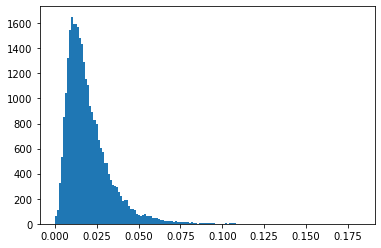

In [168]:
## DISTRIBUTION OF CLICK RATE

rates = []
uniqueTestIDs = Counter(packageData['test_id']).keys()
for testID in tqdm(uniqueTestIDs):
    if (len(RepID[testID]) > 0):
        rates.extend(packageData.iloc[RepID[testID], ]['clickrate'].values)
plt.hist(rates, bins=150)
plt.show()

### The analysis above assumed stationarity of variance, now this assumption is relaxed as the data is examined as a time series

In [2]:
## CLEANING DATASET FOR ANALYSIS USING ARMANDO'S METHOD
test_packages = pd.read_csv('test_packages.csv')
test_packages['clickrate'] = test_packages["clicks"]/test_packages["impressions"]
display(test_packages.head(50))
# removing columns which will not be analysed
test_packages = test_packages[['test_week', 'test_id', 'headline', 'image_id', 'clickrate']]
# changing test_week column to date type
packages1["test_week"] = pd.to_datetime(packages1["test_week"])
print(packages1.info())
display(test_packages.head())

,Unnamed: 0,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,impressions,clicks,first_place,winner,clickrate,high_ctr_test,high_ctr_test_image
0,12,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,NaN,NaN,4594,51,False,False,0.011101,False,False
1,22,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,a-science-guy-helps-3-dudes-from-america-under...,NaN,NaN,4571,58,False,False,0.012689,False,False
2,23,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,He Sat Them Down And Told Them About An Immine...,546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,he-sat-them-down-and-told-them-about-an-immine...,NaN,NaN,4601,27,False,False,0.005868,False,False
3,24,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,"The 3 Of Them Needed To See It In Person, And ...",546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,the-3-of-them-needed-to-see-it-in-person-and-t...,NaN,NaN,4567,63,True,False,0.013795,True,True
4,25,2014-11-20,2014-11-17,546e009a9ad54ec65b00004b,"They May Not Be The Most Handsome Dudes, But T...",546c7f2dbadeb5788700000a,Things that matter. Pass 'em on.,<p>Some decent guys fighting for an important ...,they-may-not-be-the-most-handsome-dudes-but-th...,NaN,NaN,4524,44,False,False,0.009726,False,False
5,26,2014-11-20,2014-11-17,546cb9c954524053ac000013,"The Selfies Were Already Bad Enough, But Then ...",546c7f42badeb54dd0000005,Things that matter. Pass 'em on.,<p>Africa is not your excuse to take selfies.</p>,the-selfies-were-already-bad-enough-but-then-t...,The sad thing is that she thinks she's helping.,NaN,4527,189,True,False,0.041750,True,True
6,27,2014-11-20,2014-11-17,546cb9c954524053ac000013,Warning: Beware Of Her Selfies And Stereotypes...,546c7f42badeb54dd0000005,Things that matter. Pass 'em on.,<p>Africa is not your excuse to take selfies.</p>,warning-beware-of-her-selfies-and-stereotypes-...,The sad thing is that she thinks she's helping.,NaN,4600,154,False,False,0.033478,False,False
7,28,2014-11-20,2014-11-17,546cb9c954524053ac000013,"Sigh... I Wanted To Like This Woman, But The S...",546c7f42badeb54dd0000005,Things that matter. Pass 'em on.,<p>Africa is not your excuse to take selfies.</p>,sigh-i-wanted-to-like-this-woman-but-the-selfi...,The sad thing is that she thinks she's helping.,NaN,4603,162,False,False,0.035194,False,False
8,30,2015-02-05,2015-02-02,54d1967c63666200191c0000,My Mom Forced Me To Study When I Was A Kid. Th...,54d1d11364666100261c0000,NaN,<p>Great points.</p>,my-mom-forced-me-to-study-when-i-was-a-kid-the...,NaN,NaN,2188,14,False,False,0.006399,False,False
9,31,2014-11-20,2014-11-17,546e2ce926714c856600004f,Colbert Asked Eva Longoria If She Produced A T...,546e302d26714cd2dd00005b,Things that matter. Pass 'em on.,<p>This interview is so enlightening. I really...,colbert-asked-eva-longoria-if-she-produced-a-t...,NaN,NaN,3612,50,True,False,0.013843,True,True


NameError: name 'packages1' is not defined

In [28]:
# IDENTIFYING TEST STRUCTURE

numImPerTest = []
uniqueTestIDs = Counter(test_packages['test_id']).keys()
for testID in tqdm(uniqueTestIDs):
    numImages = len(Counter(test_packages[test_packages.test_id.eq(testID)]['image_id']).values())
    numImPerTest.append(numImages)
print(Counter(numImPerTest))

100%|███████████████████████████████████████████████████████████████████████████| 15993/15993 [01:20<00:00, 199.41it/s]

Counter({1: 15176, 2: 727, 3: 81, 4: 8, 5: 1})


94.89% of the cleaned data has only one image per test, 4.55% of the remaining tests have two images. Other test structure account for only 0.56%. Note, when more k images are used in a test, we essentially treat these as k seperate tests for the purpose of our analysis.

In [9]:
# ESTIMATING VARIANCE OF EACH TEST GROUP

dic = {}
uniqueTestIDs = Counter(test_packages['test_id']).keys()
for testID in tqdm(uniqueTestIDs):
    week = pd.to_datetime(test_packages[test_packages.test_id == testID]['test_week'].values[0])
    clickrate = test_packages[test_packages.test_id == testID]['clickrate'].values
    dic[week] = statistics.variance(clickrate)
df = pd.DataFrame.from_dict(dic, orient='index')

100%|████████████████████████████████████████████████████████████████████████████| 15993/15993 [06:56<00:00, 38.35it/s]


,Sample Variance
2013-01-21,0.000049
2013-01-28,0.000036
2013-02-04,0.000087
2013-02-11,0.000011
2013-02-18,0.000049


<AxesSubplot:>

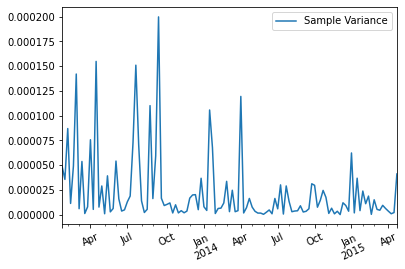

In [10]:
# PLOTTING VARIANCE OF TEST GROUPS OVER TIME

df = df.sort_index()
df = df.rename(columns={0: 'Sample Variance'})
df.describe()
display(df.head(5))
df.plot(rot=25)

We would like to test to see if this variance contains a trend component. The could be the case if, for example, editors fine tuned packages over time such that their consumption by people is more predictable. ACF and PACF plots are used to identify trend components of the time series.

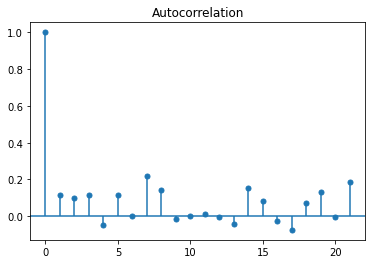

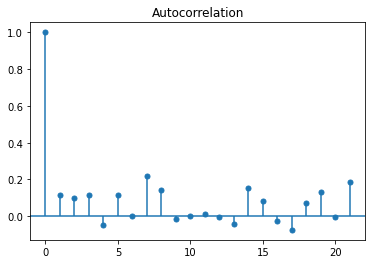

In [32]:
tsaplots.plot_acf(df, alpha=None)

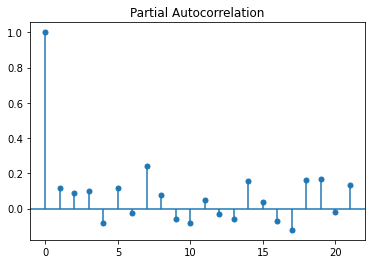

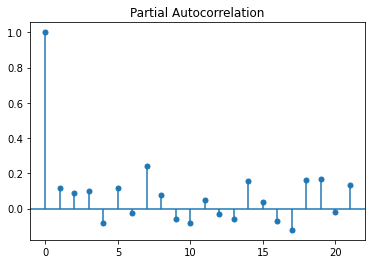

In [33]:
tsaplots.plot_pacf(df, alpha=None)

# TSA

In [54]:
# 0.0 - 0.25 bad
# 0.25 - 0.75 neutral
# 0.75 good 

# 1. Change in click rate over time
# 2. or mean per week of sentiment. Change in sentiment over time.
# 3. correlation between sentiment and clickrate over time. Constant or contingent?


### ARIMA MODELLING OF CLICK RATE FOR ALL PACKAGES - NO SENTIMENT CONSIDERATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
import statistics
import statsmodels.tsa.stattools as tsa
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns
from scipy import stats
from arch import arch_model

In [2]:
# prepping table
test_packages = pd.read_csv('test_packages.csv')
test_packages['clickrate'] = test_packages["clicks"]/test_packages["impressions"]
test_packages = test_packages[['test_week', 'test_id', 'headline', 'image_id', 'clickrate']].copy()
test_packages["test_week"] = pd.to_datetime(test_packages["test_week"])
test_packages.head()

,test_week,test_id,headline,image_id,clickrate
0,2014-11-17,546e009a9ad54ec65b00004b,What They Learned From The Scientist Was Terri...,546c7f2dbadeb5788700000a,0.011101
1,2014-11-17,546e009a9ad54ec65b00004b,A Science Guy Helps 3 Dudes From America Under...,546c7f2dbadeb5788700000a,0.012689
2,2014-11-17,546e009a9ad54ec65b00004b,He Sat Them Down And Told Them About An Immine...,546c7f2dbadeb5788700000a,0.005868
3,2014-11-17,546e009a9ad54ec65b00004b,"The 3 Of Them Needed To See It In Person, And ...",546c7f2dbadeb5788700000a,0.013795
4,2014-11-17,546e009a9ad54ec65b00004b,"They May Not Be The Most Handsome Dudes, But T...",546c7f2dbadeb5788700000a,0.009726


In [3]:
sentimentTS = test_packages[['test_week', 'clickrate']].set_index('test_week').sort_index()
weekly = sentimentTS.groupby('test_week').mean()
print(weekly.shape[0])
display(weekly.head(10))
display(weekly.tail(1))

119


,clickrate
test_week,
2013-01-21,0.026401
2013-01-28,0.024104
2013-02-04,0.023537
2013-02-11,0.020545
2013-02-18,0.014411
2013-02-25,0.019615
2013-03-04,0.012108
2013-03-11,0.018655
2013-03-18,0.015180


,clickrate
test_week,
2015-04-27,0.006836


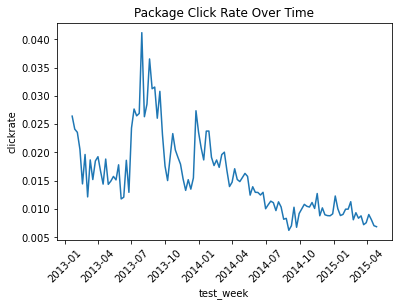

<Figure size 432x288 with 0 Axes>

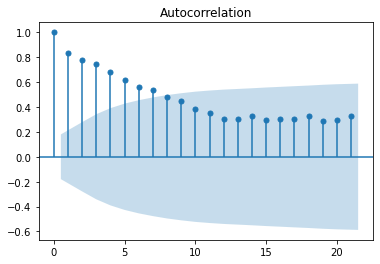

<Figure size 432x288 with 0 Axes>

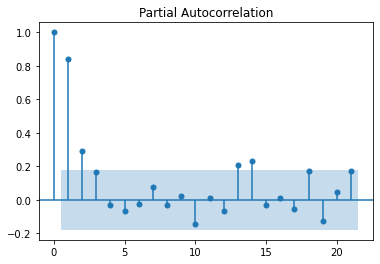

In [4]:
# Visualising Time series, and plotting ACF & PACF
fig = plt.figure()
sns.lineplot(x=weekly.index, y=weekly['clickrate'])
plt.title('Package Click Rate Over Time')
plt.xticks(rotation=45)
#plt.savefig('F1packageTS.png', dpi=300, bbox_inches='tight')
plt.show()

fig = plt.figure()
tsaplots.plot_acf(weekly, alpha=0.05)
plt.savefig('F2packagesACF.png', dpi=300, bbox_inches='tight')
plt.show()

fig = plt.figure()
tsaplots.plot_pacf(weekly, alpha=0.05)
plt.savefig('F3packagePACF.png', dpi=300, bbox_inches='tight')
plt.show()


We see a linear decay in the sample ACF plot, indicating that there may be a non-stationary component to the series. We will perform an Augmented Dickey-Fuller test to check if this is the case.

In [5]:
result = adfuller(weekly)
print('Test Statistic: ', result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[4].items():
	print(key,': ', value)

Test Statistic:  -1.7440324111841554
p-value:  0.4085802419123171
Critical Values:
1% :  -3.4880216384691867
5% :  -2.8867966864160075
10% :  -2.5802408234244947


We fail to reject the null hypothesis, that the time series has a unit root. We difference the series to remove this.

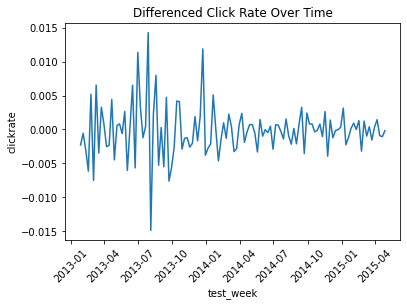

<Figure size 432x288 with 0 Axes>

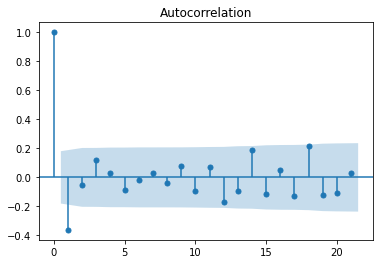

<Figure size 432x288 with 0 Axes>

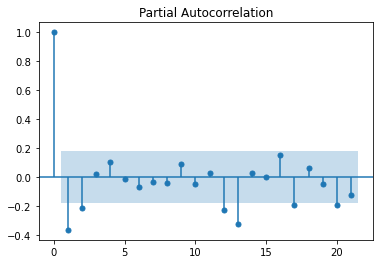

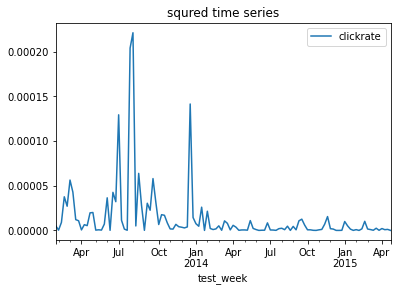

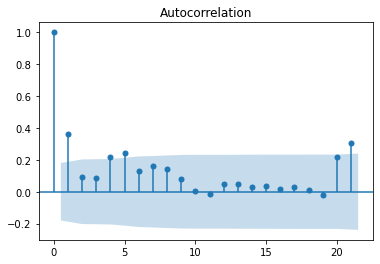

In [6]:
weeklyDiff = weekly.diff(periods=1)[1:]
# Visualising the differenced series
plt.figure()
sns.lineplot(x=weeklyDiff.index, y=weeklyDiff['clickrate'])
plt.title('Differenced Click Rate Over Time')
plt.xticks(rotation=45)
plt.savefig('F4pacDif.png', dpi=300, bbox_inches='tight')

plt.figure()
tsaplots.plot_acf(weeklyDiff, alpha=0.05)
plt.savefig('F5pacDifACF.png', dpi=300, bbox_inches='tight')

plt.figure()
tsaplots.plot_pacf(weeklyDiff, alpha=0.05)
plt.savefig('F6pacDifPACF.png', dpi=300, bbox_inches='tight')

# plotting Squared series & squared ACF to identify hetroskedastic variance
weeklyDiff.pow(2).plot(title='squred time series')
tsaplots.plot_acf(weeklyDiff.pow(2))
plt.show()

In [7]:
result = adfuller(weeklyDiff)
print('Test Statistic: ', result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[4].items():
	print(key,': ', value)

Test Statistic:  -10.878672167091251
p-value:  1.3116987558676811e-19
Critical Values:
1% :  -3.4880216384691867
5% :  -2.8867966864160075
10% :  -2.5802408234244947


Differencing the series once has removed the trend component (the original times series is integrated of order 1). Examining the ACF and PACF plots here seems to indicate that the the differenced series may be MA(1) since the ACF has only one non-null lag, while the PACF tails off exponentially. There is also a possible hetroskadastic component to the model, with variance in package click-rate falling over time.

The data is now split into a training group and a testing group (70/30 split). An ARIMA(0,1,1) is fitted to the training group. The residuals are then examined to identify hetroskedasticity. 

Note: ARIMA(0,1,1) is not the only possible model here, the behavior of the ACF and PACF plots are also indicatve of a white noise with trend $Y_t = \alpha + \beta t + \epsilon_t$

<Figure size 432x288 with 0 Axes>

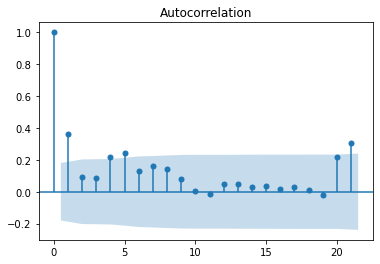

In [12]:
# Testing for hetroskedasticity
plt.figure()
tsaplots.plot_acf(weeklyDiff.pow(2), alpha=0.05)
plt.savefig('F8pacDiffSqACF.png', dpi=300, bbox_inches='tight')

In [9]:
# Fitting the model
model = ARIMA(weekly, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              clickrate   No. Observations:                  119
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 501.926
Date:                Sun, 07 Nov 2021   AIC                           -999.851
Time:                        09:47:51   BIC                           -994.310
Sample:                    01-21-2013   HQIC                          -997.601
                         - 04-27-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4343      0.057     -7.640      0.000      -0.546      -0.323
sigma2      1.181e-05    9.1e-07     12.974      0.000       1e-05    1.36e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


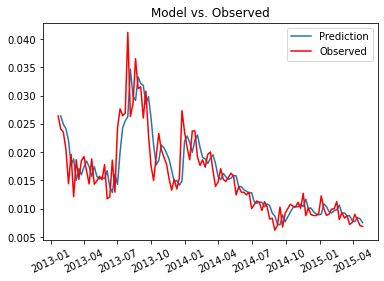

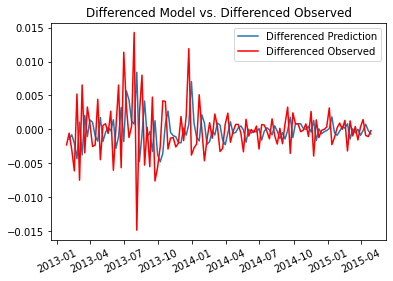

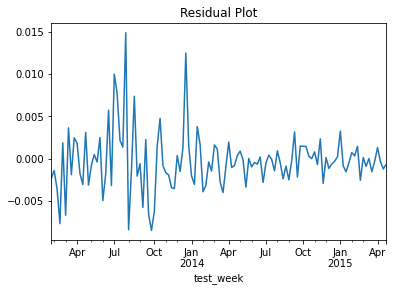

<Figure size 432x288 with 0 Axes>

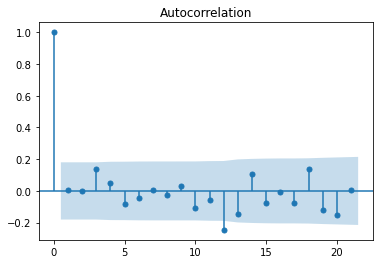

<Figure size 432x288 with 0 Axes>

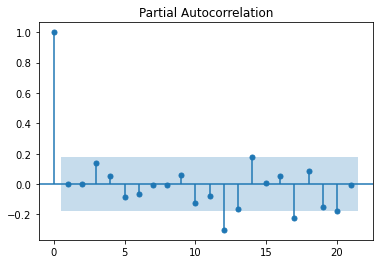

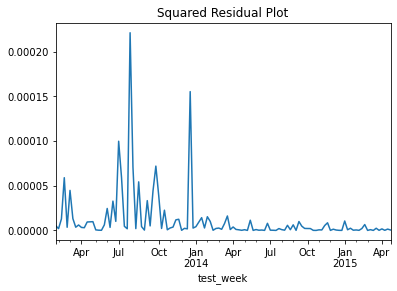

<Figure size 432x288 with 0 Axes>

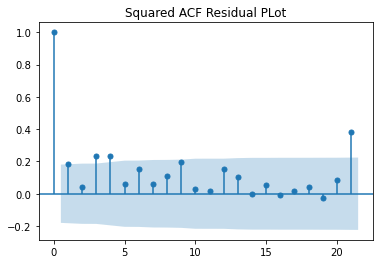

<Figure size 432x288 with 0 Axes>

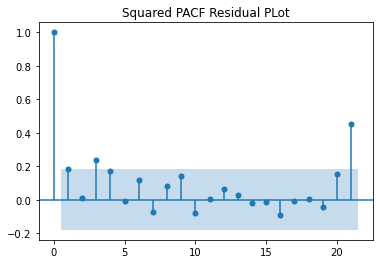

In [13]:
preds = model_fit.predict(start=1, end=118)
residuals = weekly['clickrate'][1:].subtract(preds.values)
# Plotting Fitted model vs Observed Time Series
plt.figure()
plt.plot(preds, label='Prediction')
plt.plot(weekly, color='r', label='Observed')
plt.title('Model vs. Observed')
plt.xticks(rotation=25)
plt.legend()
plt.savefig('F7fit.png', dpi=300, bbox_inches='tight')
plt.show()
# Plotting Differenced Fitted Model vs Observed Differenced Time Series
predsDiff = preds.diff(periods=1)[1:]
weeklyDiff = weekly.diff(periods=1)[1:]
plt.figure()
plt.plot(predsDiff, label='Differenced Prediction')
plt.plot(weeklyDiff, color='r', label='Differenced Observed')
plt.title('Differenced Model vs. Differenced Observed')
plt.xticks(rotation=25)
plt.legend()
plt.savefig('F8difFit.png', dpi=300, bbox_inches='tight')
plt.show()
# Plotting Model Residuals
plt.figure()
residuals.plot(title='Residual Plot')
plt.savefig('F9fitRes.png', dpi=300, bbox_inches='tight')

plt.figure()
tsaplots.plot_acf(residuals, alpha=0.05)
plt.savefig('F10fitResACF.png', dpi=300, bbox_inches='tight')

plt.figure()
tsaplots.plot_pacf(residuals, alpha=0.05)
plt.savefig('F11fitResPACF.png', dpi=300, bbox_inches='tight')

plt.figure()
residuals.pow(2).plot(title='Squared Residual Plot')
plt.savefig('F12fitResSq.png', dpi=300, bbox_inches='tight')

# AFC plots for squared Residuals
plt.figure()
tsaplots.plot_acf(residuals.pow(2), alpha=0.05, title='Squared ACF Residual PLot')
plt.savefig('F12fitResSqACF.png', dpi=300, bbox_inches='tight')

# PACF plots for squared Residuals
plt.figure()
tsaplots.plot_pacf(residuals.pow(2), alpha=0.05, title='Squared PACF Residual PLot')
plt.savefig('F15fitResSqPACF.png', dpi=300, bbox_inches='tight')

In [14]:
print(residuals)
print(residuals.pow(2))

test_week
2013-01-28   -0.002297
2013-02-04   -0.001406
2013-02-11   -0.003585
2013-02-18   -0.007682
2013-02-25    0.001870
                ...   
2015-03-30   -0.000324
2015-04-06    0.001306
2015-04-13   -0.000339
2015-04-20   -0.001216
2015-04-27   -0.000707
Name: clickrate, Length: 118, dtype: float64
test_week
2013-01-28    5.273922e-06
2013-02-04    1.977361e-06
2013-02-11    1.285093e-05
2013-02-18    5.901908e-05
2013-02-25    3.498582e-06
                  ...     
2015-03-30    1.047754e-07
2015-04-06    1.706720e-06
2015-04-13    1.150199e-07
2015-04-20    1.479127e-06
2015-04-27    4.995566e-07
Name: clickrate, Length: 118, dtype: float64


Ljung Box Test Stat is [18.97791466] with a p-value of [0.26981012]
McLeod-Li Test Stat is [33.01024795] with a p-value of [0.00736712]


C:\Users\micha\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


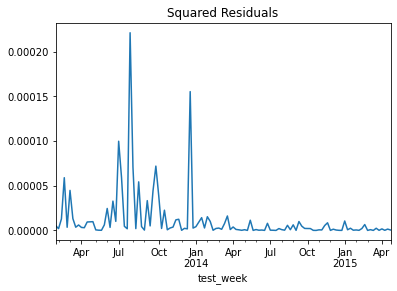

ShapiroResult(statistic=0.9010747671127319, pvalue=2.6929052410196164e-07)


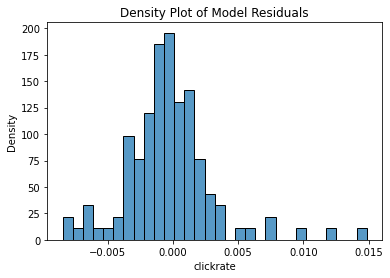

<Figure size 432x288 with 0 Axes>

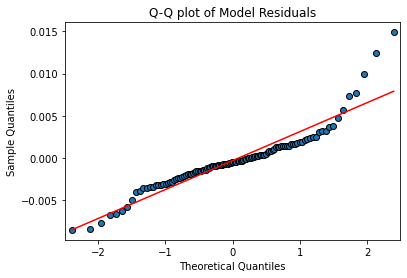

In [16]:
# EXAMINING RESIDUALS
# Ljung Box test
print('Ljung Box Test Stat is {} with a p-value of {}'.format(acorr_ljungbox(residuals, lags=[16])[0], acorr_ljungbox(residuals, lags=[16])[1]))
# McLeod-Li test
print('McLeod-Li Test Stat is {} with a p-value of {}'.format(acorr_ljungbox(residuals.pow(2), lags=[16])[0], acorr_ljungbox(residuals.pow(2), lags=[16])[1]))

# plotting squared residuals
residuals.pow(2).plot(title='Squared Residuals')
plt.show()
# histogram of residuals
plt.figure()
ax = sns.histplot(residuals, stat='density', bins=30).set_title('Density Plot of Model Residuals') 
plt.savefig('F13resHist.png', dpi=300, bbox_inches='tight')

# Shapiro Wilk test for normality
print(shapiro(residuals))
# qqplot
plt.figure()
sm.qqplot(residuals, line='s', markerfacecolor='#1f77b4', markeredgecolor='k')
plt.title('Q-Q plot of Model Residuals')
plt.savefig('F14resQQ.png', dpi=300, bbox_inches='tight')
plt.show()

In terms of hetroskedasticity, the results above aren't significant. The squared plot of residuals showed some spikes in residaul magnitude which reduced over time, but this behaivior wasn't repeated in the squared acf plot. For hetroskedastic 

The Lyung-Box test statistic was not significant, indicating that the residuals are indeed a white noise (no autocorrolation). The Shapiro Wilk test is significant, idicating the residuals are not normally distributed. The qqplot shows that although the residuals agree well with the normal quantiles, they diverge in the tail. I hypothesise that this may be cause by phenomena such as 'viral/trending' posts, where the usual model fails to apply

In [17]:
# Creating GARCH model, where q is set to one, its coefficients significance tested, incremented, and so on
model = arch_model(residuals, mean='Zero', vol='GARCH', p=1, q=0)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      3,   Neg. LLF: -498.4561889517784
Optimization terminated successfully    (Exit mode 0)
            Current function value: -498.4561886907639
            Iterations: 5
            Function evaluations: 3
            Gradient evaluations: 1


C:\Users\micha\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.173e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:              clickrate   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.008
Vol Model:                       ARCH   Log-Likelihood:                498.456
Distribution:                  Normal   AIC:                          -992.912
Method:            Maximum Likelihood   BIC:                          -987.371
                                        No. Observations:                  118
Date:                Sun, Nov 07 2021   Df Residuals:                      118
Time:                        10:27:28   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      5.9076e-06  1.706e-10  3.463e+04      0.000 [5.907e-06,5.908e-06]
alpha[1]       0.2000      0.104      1.929  5.377e-02  [-3.247e-03,  0.403]
============================================================================

Covariance estimator: robust
"""

In [18]:
# Creating GARCH model, where q is set to one, its coefficients significance tested, incremented, and so on
model = arch_model(residuals, mean='Zero', vol='GARCH', p=1, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      4,   Neg. LLF: -525.2994405409373
Optimization terminated successfully    (Exit mode 0)
            Current function value: -525.2994398686614
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1


C:\Users\micha\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.173e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:              clickrate   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.008
Vol Model:                      GARCH   Log-Likelihood:                525.299
Distribution:                  Normal   AIC:                          -1044.60
Method:            Maximum Likelihood   BIC:                          -1036.29
                                        No. Observations:                  118
Date:                Sun, Nov 07 2021   Df Residuals:                      118
Time:                        10:27:28   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.3630e-07  1.277e-10   1850.987      0.000 [2.361e-07,2.366e-07]
alpha[1]       0.2000  9.825e-02      2.036  4.179e-02   [7.430e-03,  0.393]
beta[1]        0.7800  8.331e-02      9.363  7.743e-21     [  0.617,  0.943]
============================================================================

Covariance estimator: robust
"""

In [19]:
# Creating GARCH model, where q is set to 2
model = arch_model(residuals, mean='Zero', vol='GARCH', p=1, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 44467670.97506537
Iteration:      2,   Func. Count:     14,   Neg. LLF: 170.1049710921099
Iteration:      3,   Func. Count:     23,   Neg. LLF: 170.1049710921099
Optimization terminated successfully    (Exit mode 0)
            Current function value: -526.173281614426
            Iterations: 3
            Function evaluations: 33
            Gradient evaluations: 3


C:\Users\micha\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.173e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:              clickrate   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.008
Vol Model:                      GARCH   Log-Likelihood:                526.173
Distribution:                  Normal   AIC:                          -1044.35
Method:            Maximum Likelihood   BIC:                          -1033.26
                                        No. Observations:                  118
Date:                Sun, Nov 07 2021   Df Residuals:                      118
Time:                        10:27:29   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.3504e-07  9.517e-11   2469.689      0.000 [2.349e-07,2.352e-07]
alpha[1]       0.1991  9.398e-02      2.118  3.416e-02   [1.487e-02,  0.383]
beta[1]        0.3881      0.151      2.566  1.029e-02   [9.163e-02,  0.684]
beta[2]        0.3881      0.190      2.047  4.069e-02   [1.644e-02,  0.760]
============================================================================

Covariance estimator: robust
"""

In [20]:
# Creating GARCH model, where q is set to 2
model = arch_model(residuals, mean='Zero', vol='GARCH', p=1, q=3)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -526.3012876454696
Optimization terminated successfully    (Exit mode 0)
            Current function value: -526.3012883756053
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1


C:\Users\micha\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.173e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:              clickrate   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.008
Vol Model:                      GARCH   Log-Likelihood:                526.301
Distribution:                  Normal   AIC:                          -1042.60
Method:            Maximum Likelihood   BIC:                          -1028.75
                                        No. Observations:                  118
Date:                Sun, Nov 07 2021   Df Residuals:                      118
Time:                        10:27:29   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.3630e-07  7.125e-11   3316.318      0.000 [2.362e-07,2.364e-07]
alpha[1]       0.2000      0.163      1.224      0.221     [ -0.120,  0.520]
beta[1]        0.2600      0.213      1.223      0.221     [ -0.157,  0.677]
beta[2]        0.2600      0.174      1.493      0.135  [-8.126e-02,  0.601]
beta[3]        0.2600      0.215      1.210      0.226     [ -0.161,  0.681]
============================================================================

Covariance estimator: robust
"""

C:\Users\micha\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.173e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      4,   Neg. LLF: -525.2994405409373
Optimization terminated successfully    (Exit mode 0)
            Current function value: -525.2994398686614
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1


<Figure size 432x288 with 0 Axes>

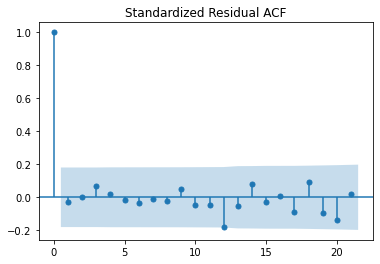

<Figure size 432x288 with 0 Axes>

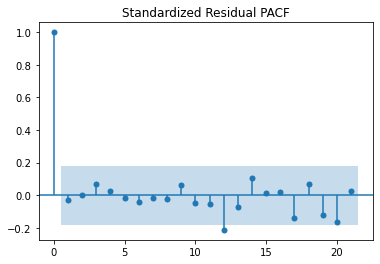

<Figure size 432x288 with 0 Axes>

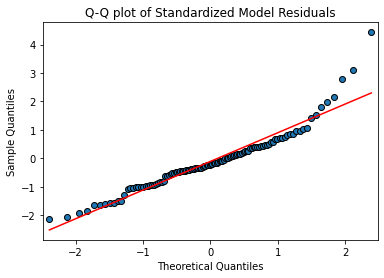

Ljung Box Test Stat is [7.52124492] with a p-value of [0.96185937]
McLeod-Li Test Stat is [6.46645601] with a p-value of [0.98222844]
Shapiro-Wilk Test Stat is 0.9308177828788757 with a p-value of 1.2681768566835672e-05


C:\Users\micha\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [21]:
model = arch_model(residuals, mean='Zero', vol='GARCH', p=1, q=1)
model_fit = model.fit()
standRes = model_fit.resid/model_fit.conditional_volatility

# plotting standardized residuals
plt.figure()
tsaplots.plot_acf(standRes, alpha=0.05, title='Standardized Residual ACF')
plt.savefig('F16garchResACF.png', dpi=300, bbox_inches='tight')

# ACF of Standardized residuals
plt.figure()
tsaplots.plot_pacf(standRes, alpha=0.05, title='Standardized Residual PACF')
plt.savefig('F17garchResPACF.png', dpi=300, bbox_inches='tight')

# Q-Q plot of standardized residuals
plt.figure()
sm.qqplot(standRes, line='s', markerfacecolor='#1f77b4', markeredgecolor='k')
plt.title('Q-Q plot of Standardized Model Residuals')
plt.savefig('F18garchResQQ.png', dpi=300, bbox_inches='tight')
plt.show()

# RESIDUAL TESTS
# Ljung Box test
print('Ljung Box Test Stat is {} with a p-value of {}'.format(acorr_ljungbox(standRes, lags=[16])[0], acorr_ljungbox(standRes, lags=[16])[1]))
# McLeod-Li test
print('McLeod-Li Test Stat is {} with a p-value of {}'.format(acorr_ljungbox(standRes.pow(2), lags=[16])[0], acorr_ljungbox(standRes.pow(2), lags=[16])[1]))
# Shapiro Wilk test for normality
print('Shapiro-Wilk Test Stat is {} with a p-value of {}'.format(shapiro(standRes)[0], shapiro(standRes)[1]))

Iteration:      1,   Func. Count:      4,   Neg. LLF: -525.2994405409373
Optimization terminated successfully    (Exit mode 0)
            Current function value: -525.2994398686614
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1


C:\Users\micha\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.173e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<AxesSubplot:xlabel='test_week'>

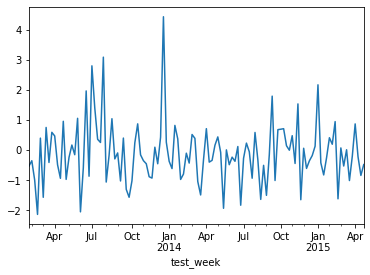

In [179]:
# Creating GARCH model, where q is set to one, its coefficients significance tested, incremented, and so on
model = arch_model(residuals, mean='Zero', vol='GARCH', p=1, q=1)
model_fit = model.fit()
standRes = model_fit.resid/model_fit.conditional_volatility
standRes.plot()

<Figure size 432x288 with 0 Axes>

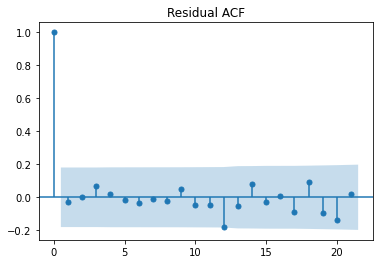

<Figure size 432x288 with 0 Axes>

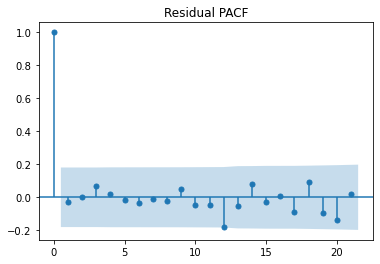

<Figure size 432x288 with 0 Axes>

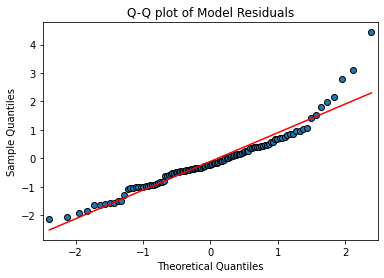

In [183]:
plt.figure()
tsaplots.plot_acf(standRes, alpha=0.05, title='Residual ACF')
plt.savefig('F16garchResACF.png', dpi=300, bbox_inches='tight')

plt.figure()
tsaplots.plot_acf(standRes, alpha=0.05, title='Residual PACF')
plt.savefig('F17garchResPACF.png', dpi=300, bbox_inches='tight')

plt.figure()
sm.qqplot(standRes, line='s', markerfacecolor='#1f77b4', markeredgecolor='k')
plt.title('Q-Q plot of Model Residuals')
plt.savefig('F18garchResQQ.png', dpi=300, bbox_inches='tight')
plt.show()

In [186]:
# RESIDUAL TESTS
# Ljung Box test
print('Ljung Box Test Stat is {} with a p-value of {}'.format(acorr_ljungbox(standRes, lags=[16])[0], acorr_ljungbox(standRes, lags=[16])[1]))
# McLeod-Li test
print('McLeod-Li Test Stat is {} with a p-value of {}'.format(acorr_ljungbox(standRes.pow(2), lags=[16])[0], acorr_ljungbox(standRes.pow(2), lags=[16])[1]))
# Shapiro Wilk test for normality
print('Shapiro-Wilk Test Stat is {} with a p-value of {}'.format(shapiro(standRes)[0], shapiro(standRes)[1]))

Ljung Box Test Stat is [7.52124492] with a p-value of [0.96185937]
McLeod-Li Test Stat is [6.46645601] with a p-value of [0.98222844]
Shapiro-Wilk Test Stat is 0.9308177828788757 with a p-value of 1.2681768566835672e-05
